Script de Análise de Vendas Superstore
- Caso real: Rede de lojas de material de escritório e utilidades domésticas.
- Dataset: Superstore Sales (8399 registros) disponível em
- https://raw.githubusercontent.com/curran/data/gh-pages/superstoreSales/superstoreSales.csv

Bibliotecas

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Carregamento de dados

In [14]:
url = (
    'https://raw.githubusercontent.com/curran/data/gh-pages'
    '/superstoreSales/superstoreSales.csv'
)
df = pd.read_csv(url, encoding='ISO-8859-1')  

df

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,10/13/2010,Low,6,261.5400,0.04,Regular Air,-213.25,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,10/20/2010
1,49,293,10/1/2012,High,49,10123.0200,0.07,Delivery Truck,457.81,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,10/2/2012
2,50,293,10/1/2012,High,27,244.5700,0.01,Regular Air,46.71,8.69,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D¨ Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,10/3/2012
3,80,483,7/10/2011,High,30,4965.7595,0.08,Regular Air,1198.97,195.99,...,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,7/12/2011
4,85,515,8/28/2010,Not Specified,19,394.2700,0.08,Regular Air,30.94,21.78,...,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,8/30/2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,7765,55558,8/9/2010,Medium,8,1294.0400,0.05,Delivery Truck,-323.18,150.98,...,Mick Brown,Alberta,West,Consumer,Furniture,Bookcases,Bush Mission Pointe Library,Jumbo Box,0.65,8/9/2010
8395,7766,55558,8/9/2010,Medium,23,392.5700,0.04,Regular Air,22.25,17.07,...,Mick Brown,Alberta,West,Consumer,Office Supplies,Envelopes,Recycled Interoffice Envelopes with Re-Use-A-S...,Small Box,0.38,8/11/2010
8396,7906,56550,4/8/2011,Not Specified,37,823.7800,0.03,Express Air,343.05,22.23,...,Frank Hawley,Alberta,West,Home Office,Furniture,Office Furnishings,"Executive Impressions 14""",Small Pack,0.41,4/10/2011
8397,7907,56550,4/8/2011,Not Specified,8,469.8375,0.00,Regular Air,-159.24,65.99,...,Frank Hawley,Alberta,West,Home Office,Technology,Telephones and Communication,Talkabout T8367,Small Box,0.56,4/9/2011


2. Visão inicial

In [15]:
print("Primeiras linhas do dataset:")
print(df.head(), "\n")

Primeiras linhas do dataset:
   Row ID  Order ID  Order Date Order Priority  Order Quantity       Sales  \
0       1         3  10/13/2010            Low               6    261.5400   
1      49       293   10/1/2012           High              49  10123.0200   
2      50       293   10/1/2012           High              27    244.5700   
3      80       483   7/10/2011           High              30   4965.7595   
4      85       515   8/28/2010  Not Specified              19    394.2700   

   Discount       Ship Mode   Profit  Unit Price  ...       Customer Name  \
0      0.04     Regular Air  -213.25       38.94  ...  Muhammed MacIntyre   
1      0.07  Delivery Truck   457.81      208.16  ...        Barry French   
2      0.01     Regular Air    46.71        8.69  ...        Barry French   
3      0.08     Regular Air  1198.97      195.99  ...       Clay Rozendal   
4      0.08     Regular Air    30.94       21.78  ...      Carlos Soltero   

  Province   Region Customer Segment Pr

3. Limpeza e preparação

In [16]:
print("Informações do dataset antes do tratamento:")
print(df.info(), "\n")

Informações do dataset antes do tratamento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row ID                8399 non-null   int64  
 1   Order ID              8399 non-null   int64  
 2   Order Date            8399 non-null   object 
 3   Order Priority        8399 non-null   object 
 4   Order Quantity        8399 non-null   int64  
 5   Sales                 8399 non-null   float64
 6   Discount              8399 non-null   float64
 7   Ship Mode             8399 non-null   object 
 8   Profit                8399 non-null   float64
 9   Unit Price            8399 non-null   float64
 10  Shipping Cost         8399 non-null   float64
 11  Customer Name         8399 non-null   object 
 12  Province              8399 non-null   object 
 13  Region                8399 non-null   object 
 14  Customer Segment      8399 n

Tratar valores ausentes em 'Product Base Margin'

In [17]:
missing_before = df['Product Base Margin'].isna().sum()
print(f"Valores ausentes em 'Product Base Margin' antes: {missing_before}")
df['Product Base Margin'].fillna(
    df['Product Base Margin'].median(), inplace=True
)
missing_after = df['Product Base Margin'].isna().sum()
print(f"Valores ausentes em 'Product Base Margin' depois: {missing_after}\n")

Valores ausentes em 'Product Base Margin' antes: 63
Valores ausentes em 'Product Base Margin' depois: 0



C:\Users\CASARIM\AppData\Local\Temp\ipykernel_4480\4156418780.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product Base Margin'].fillna(


4. Análise exploratória

Vendas totais por região

In [18]:
sales_region = df.groupby('Region')['Sales'].sum().sort_values()
print("Vendas totais por região:")
print(sales_region, "\n")

Vendas totais por região:
Region
Nunavut                  1.163765e+05
Northwest Territories    8.008473e+05
Yukon                    9.758674e+05
Quebec                   1.510195e+06
Atlantic                 2.014248e+06
Prarie                   2.837305e+06
Ontario                  3.063212e+06
West                     3.597549e+06
Name: Sales, dtype: float64 



Gráfico: Vendas por Região

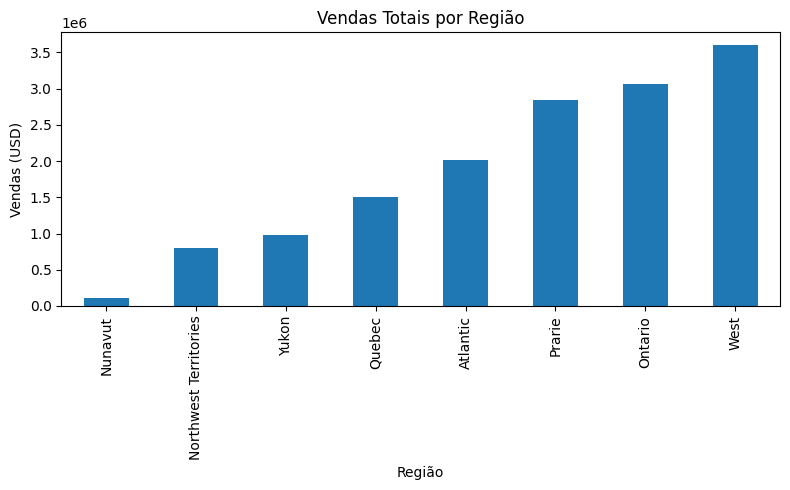

In [19]:
plt.figure(figsize=(8, 5))
sales_region.plot(kind='bar')
plt.title('Vendas Totais por Região')
plt.ylabel('Vendas (USD)')
plt.xlabel('Região')
plt.tight_layout()
plt.show()

Dispersão: Vendas x Lucro

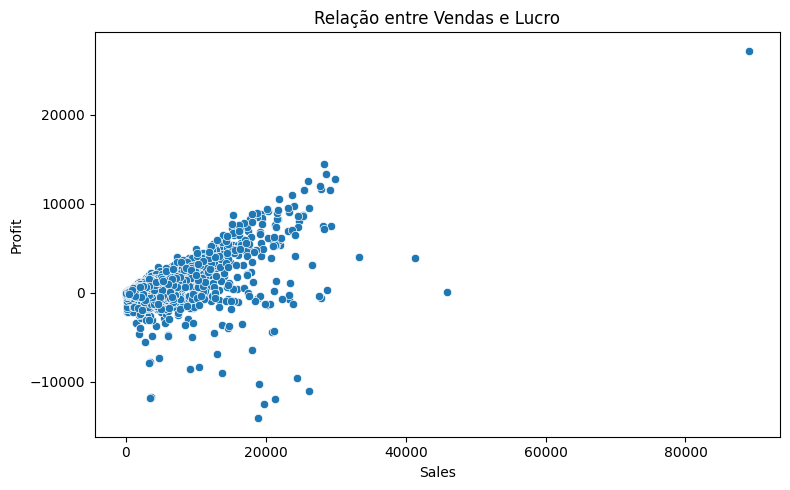

In [20]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Sales', y='Profit')
plt.title('Relação entre Vendas e Lucro')
plt.tight_layout()
plt.show()

Distribuição de vendas por categoria

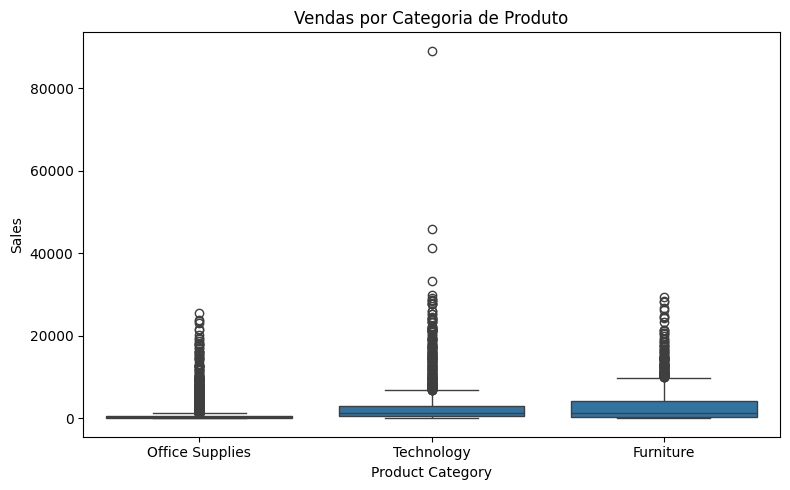

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Product Category', y='Sales')
plt.title('Vendas por Categoria de Produto')
plt.tight_layout()
plt.show()

5. Conclusões e recomendações:
    
Conclusões:
- Região Oeste apresenta maior faturamento, mas margens de lucro variam amplamente

- Relação positiva entre vendas e lucro, porém existem ordens com lucro negativo indicando descontos ou custos elevados de frete.
    
- Categoria Technology mostra maior variação de vendas, sugerindo portfólio diversificado.
    

Recomendações: 
- Revisar política de descontos para minimizar transações com lucro negativo.
- Otimizar custos de frete, negociando tarifas ou usando parceiros logísticos regionais.
- Focar campanhas de marketing na Região Central, que tem potencial de crescimento moderado.
- Expandir mix de produtos Technology em regiões de alto desempenho.
- Monitorar margens de Product Base Margin periodicamente para ajustar preços.